## Model optimization example

This is an example for optimizing a regression model using gradient descent.

Consider the following function: 

$$ f(x) = w_0 x_0^2 + w_1 x_1^2 + b $$

where $x=[x_0, x_1]$, $w=[w_0, w_1]$ and $b$ is a scalar. The value of $f(x)$ is a scalar.

Lets assume we have a dataset of examples $(x, y)$ that has been generated from $y = f(x)$.

The goal is to find parameters $\theta = \{ w_0, w_1, b \}$ so that $f(x)$ fits the datset as good as possible.

More formally we'll use a **mean square error** loss function:

$$L(x, y, \theta) = (f(x;\theta) - y)^2$$

The goal is to find parameters $\theta$ that minimize the loss function with regard to our dataset.

## Partial derivatives

The partial derivatives of $f(x)$ w.r.t. the parameters $w$ and $b$ are:

$ \frac{\partial}{\partial w_0} f(x) = x_o^2$ 

$ \frac{\partial}{\partial w_1} f(x) = x_1^2$ 

$ \frac{\partial}{\partial b} f(x) = 1$ 

The partial derivatives of $L$ w.r.t. the parameters $w$ and $b$ are calculated by applying the [chain rule](https://en.wikipedia.org/wiki/Chain_rule):

$\frac{\partial}{\partial w_0} L = 2(f(x) - y) \ \frac{\partial}{\partial w_0} (f(x)-y) = 2(f(x) - y) \ x_0^2$

$\frac{\partial}{\partial w_1} L = 2(f(x) - y) \ \frac{\partial}{\partial w_1} (f(x) - y) = 2(f(x) - y) \ x_1^2$

$\frac{\partial}{\partial b} L = 2(f(x) - y) \ \frac{\partial}{\partial b} (f(x)-y) = 2(f(x) - y)$



In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

true parameters: [-0.8  1.3] [0.5]
estimated parameters [-0.79225649  1.30705323] [0.4747768]


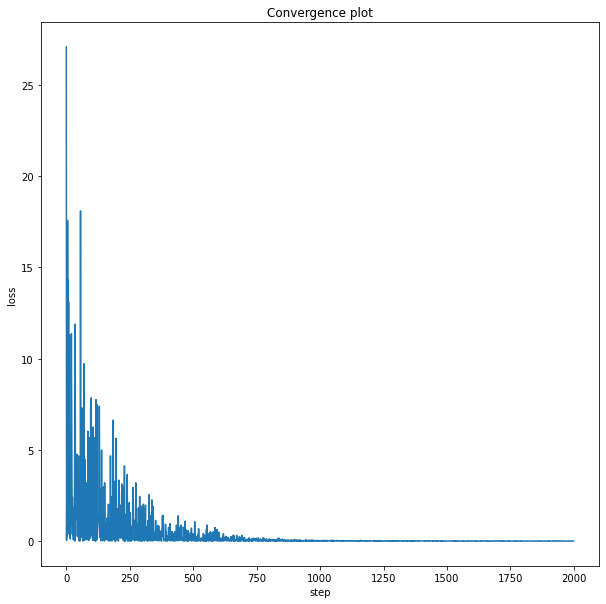

In [2]:
# f is parametrized with `w` and `b` so we can use it
# to calculate `y` and `y_hat`
def f(x, w, b):
    assert x.shape[0] == 2
    assert w.shape[0] == 2
    assert b.shape[0] == 1
    return w[0] * x[0]**2 + w[1] * x[1]**2 + b[0]

# the true parameters that we are trying to estimate
true_w = np.array([-0.8, 1.3])
true_b = np.array([0.5])

# initialize model parameters with small random values
w = np.random.normal(loc=0.0, scale=0.01, size=(2,))
b = np.random.normal(loc=0.0, scale=0.01, size=(1,))

# hyperparameter
alpha = 0.001

nb_iterations = 5000

# loss history
losses = []

for i in range(nb_iterations):
    
    # normally we would read the train examples x and labels y from a 
    # train dataset since we know the generating function we simply 
    # calculate them on the fly
    x = (np.random.rand(2) * 4.0) - np.array([2.0, 2.0])
    y = f(x, true_w, true_b)

    # forward pass
    y_hat = f(x, w, b)
    
    # calculate loss for reporting
    loss = (y_hat - y)**2
    losses.append(loss)

    # backward pass
    
    # calculate partial derivatives of the loss w.r.t. w and b
    dloss_dw0 = 2 * (y_hat - y) * x[0]**2
    dloss_dw1 = 2 * (y_hat - y) * x[1]**2
    dloss_db = 2 * (y_hat - y)
    
    # apply the update rule
    w = w - alpha * np.array([dloss_dw0, dloss_dw1])
    b = b - alpha * np.array([dloss_db])

print('true parameters:', true_w, true_b)
print('estimated parameters', w, b)

# plot the loss over time
plt.figure(figsize=(10,10))
plt.title('Convergence plot')
plt.xlabel('step')
plt.ylabel('loss')
plt.plot(losses[:2000])
plt.show()


**Note:** this examples goes through the details of gradient calculation and parameter updating to demonstrate how gradient descent works. In practice you do not have to implement this yourself because the functionality is provided by a machine learning framework.